In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

In [2]:
# df = pd.read_csv('klocality_with_age-sex.csv')
df = pd.read_csv('weighted_klocality_with_age-sex.csv')
df.head()

,id,sex,age,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,NDARED632KNG,1,17.203855,209.718112,381.652211,214.320153,381.652211,56.129677,358.235969,291.505102,...,34.656888,354.353316,8.263605,247.242347,23.028486,341.757653,97.061650,369.377976,90.148810,369.377976
1,NDARFM080VAF,1,7.623203,166.838435,336.744048,145.366922,336.744048,49.201105,301.612245,202.822279,...,68.623724,313.786565,4.839286,149.860969,4.884779,126.546769,57.418367,323.283163,52.258929,316.735544
2,NDARFW130NGG,1,8.316107,128.911990,328.406463,166.497874,343.703656,45.776361,294.478316,181.946429,...,55.549320,307.250850,4.834609,80.788690,30.820153,280.695578,47.439626,306.156463,42.463435,311.316752
3,NDARHP656DLC,0,10.936459,132.957058,280.110119,33.508503,247.247874,58.221088,266.772534,136.699405,...,46.073129,207.093963,2.553997,86.233418,2.579507,129.354167,39.289541,237.555697,29.299745,244.744473
4,NDARDR658DRA,0,6.421857,153.317602,379.272959,191.645833,379.272959,14.439626,357.362245,351.558673,...,49.868197,361.213861,12.909864,356.203231,17.310374,345.225340,153.690901,366.453656,80.718537,363.887330


In [3]:
df.shape

(91, 99)

In [4]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import KFold

In [5]:
kf = KFold(n_splits=5)
clf = RandomForestClassifier(n_estimators=250)

In [6]:
res = []

for i in range(100):
    
    print(i)

    df_data = df[df.columns[3:]]
    labels = df['sex']

    acc = []

    for train, test in kf.split(df):

        # Split into train/test sets
        X_train, y_train, X_test, y_test = df_data.iloc[train], labels.iloc[train], df_data.iloc[test], labels.iloc[test]

        # Fit training data to model and predict test cases
        y_pred = clf.fit(X_train, y_train).predict(X_test)

        # Score the prediction
        acc.append(accuracy_score(y_test, y_pred))
        
    res.append(np.mean(acc))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
np.mean(res)

0.6603625730994154

In [8]:
np.var(res) ** (1/2)

0.013676356020426985

Text(0.5,0,'Accuracy')

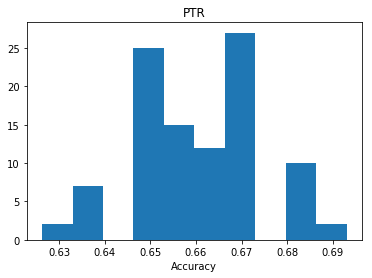

In [9]:
plt.hist(res)
plt.title('PTR')
plt.xlabel('Accuracy')